### face detection, convert to grayscale, resize

In [1]:
import cv2
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
from imutils import paths
import imutils
import os

In [3]:
def resize_image(im, max_size=768):
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
        print(f"Resize image to ({str(int(im.shape[1]*ratio))}, {str(int(im.shape[0]*ratio))}).")
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)
    return im

Resize image to (768, 653).


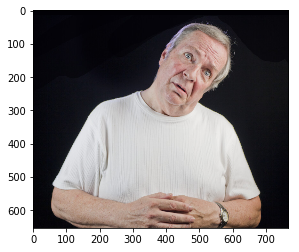

In [5]:
# Test images
im = cv2.imread("00000000.jpg")[..., ::-1]
im = resize_image(im) # Resize image to prevent GPU OOM.
h, w, _ = im.shape
plt.imshow(im)

In [6]:
from models.detector import face_detector

fd = face_detector.FaceAlignmentDetector(
    lmd_weights_path="./models/detector/FAN/2DFAN-4_keras.h5"# 2DFAN-4_keras.h5, 2DFAN-1_keras.h5
)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
bboxes = fd.detect_face(im, with_landmarks=False)
assert len(bboxes) > 0, "No face detected."

# Display detected face
x0, y0, x1, y1, score = bboxes[0] # show the first detected face
x0, y0, x1, y1 = map(int, [x0, y0, x1, y1])

#convert from rgb to grayscale
gray_image = cv2.cvtColor(im[x0:x1, y0:y1, :], cv2.COLOR_BGR2GRAY)

# gray_image.shape

gray_img = cv2.resize(gray_image,(64,64))


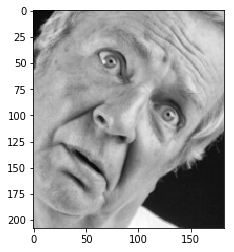

In [9]:
plt.imshow(gray_image, cmap='gray')

In [10]:
# grab the image paths then initialize the dictionary of character counts
imagePaths = list(paths.list_images('depressed'))
count = 0

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # display an update to the user
    print("[INFO] processing image {}/{}".format(i + 1, len(imagePaths)))

    img = cv2.imread(imagePath)[..., ::-1]
    img = resize_image(img) # Resize image to prevent GPU OOM.
    
    #assert len(bboxes) > 0, "No face detected."

    # can't alwayd detect the faces
    try:
        bboxes = fd.detect_face(img, with_landmarks=False)
        x0, y0, x1, y1, score = bboxes[0] # show the first detected face
        x0, y0, x1, y1 = map(int, [x0, y0, x1, y1])
        #convert from rgb to grayscale
        gray_image = cv2.cvtColor(img[x0:x1, y0:y1, :], cv2.COLOR_BGR2GRAY)
    except:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # gray_image.shape

    gray_img = cv2.resize(gray_image,(64,64))
    count = count+1
    p = os.path.sep.join(['clean_dp', "{}.png".format(str(count).zfill(6))])
    cv2.imwrite(p,gray_img)


[INFO] processing image 1/251
Resize image to (768, 653).
[INFO] processing image 2/251
Resize image to (768, 511).
[INFO] processing image 3/251
Resize image to (768, 564).
[INFO] processing image 4/251
Resize image to (565, 768).
[INFO] processing image 5/251
Resize image to (768, 511).
[INFO] processing image 6/251
Resize image to (768, 576).
[INFO] processing image 7/251
[INFO] processing image 8/251
Resize image to (565, 768).
[INFO] processing image 9/251
Resize image to (768, 572).
[INFO] processing image 10/251
Resize image to (768, 565).
[INFO] processing image 11/251
Resize image to (563, 768).
[INFO] processing image 12/251
Resize image to (563, 768).
[INFO] processing image 13/251
Resize image to (768, 612).
[INFO] processing image 14/251
Resize image to (768, 574).
[INFO] processing image 15/251
[INFO] processing image 16/251
Resize image to (768, 560).
[INFO] processing image 17/251
Resize image to (565, 768).
[INFO] processing image 18/251
Resize image to (768, 564).
[IN

[INFO] processing image 175/251
Resize image to (768, 432).
[INFO] processing image 176/251
Resize image to (576, 768).
[INFO] processing image 177/251
[INFO] processing image 178/251
[INFO] processing image 179/251
Resize image to (768, 564).
[INFO] processing image 180/251
Resize image to (768, 565).
[INFO] processing image 181/251
[INFO] processing image 182/251
[INFO] processing image 183/251
[INFO] processing image 184/251
Resize image to (768, 432).
[INFO] processing image 185/251
Resize image to (768, 597).
[INFO] processing image 186/251
[INFO] processing image 187/251
[INFO] processing image 188/251
Resize image to (512, 768).
[INFO] processing image 189/251
Resize image to (768, 432).
[INFO] processing image 190/251
Resize image to (768, 564).
[INFO] processing image 191/251
[INFO] processing image 192/251
[INFO] processing image 193/251
Resize image to (768, 511).
[INFO] processing image 194/251
Resize image to (768, 432).
[INFO] processing image 195/251
[INFO] processing im

In [11]:
#non_dp

In [12]:
# grab the image paths then initialize the dictionary of character counts
imagePaths = list(paths.list_images('nondepressed'))
count = 0

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # display an update to the user
    print("[INFO] processing image {}/{}".format(i + 1, len(imagePaths)))

    img = cv2.imread(imagePath)[..., ::-1]
    img = resize_image(img) # Resize image to prevent GPU OOM.
    
    #assert len(bboxes) > 0, "No face detected."

    # can't alwayd detect the faces
    try:
        bboxes = fd.detect_face(img, with_landmarks=False)
        x0, y0, x1, y1, score = bboxes[0] # show the first detected face
        x0, y0, x1, y1 = map(int, [x0, y0, x1, y1])
        #convert from rgb to grayscale
        gray_image = cv2.cvtColor(img[x0:x1, y0:y1, :], cv2.COLOR_BGR2GRAY)
    except:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # gray_image.shape

    gray_img = cv2.resize(gray_image,(64,64))
    count = count+1
    p = os.path.sep.join(['clean_non_dp', "{}.png".format(str(count).zfill(6))])
    cv2.imwrite(p,gray_img)


[INFO] processing image 1/253
[INFO] processing image 2/253
[INFO] processing image 3/253
Resize image to (510, 768).
[INFO] processing image 4/253
[INFO] processing image 5/253
[INFO] processing image 6/253
[INFO] processing image 7/253
Resize image to (510, 768).
[INFO] processing image 8/253
[INFO] processing image 9/253
Resize image to (768, 432).
[INFO] processing image 10/253
Resize image to (509, 768).
[INFO] processing image 11/253
[INFO] processing image 12/253
[INFO] processing image 13/253
[INFO] processing image 14/253
[INFO] processing image 15/253
[INFO] processing image 16/253
Resize image to (768, 432).
[INFO] processing image 17/253
[INFO] processing image 18/253
[INFO] processing image 19/253
[INFO] processing image 20/253
Resize image to (509, 768).
[INFO] processing image 21/253
[INFO] processing image 22/253
[INFO] processing image 23/253
[INFO] processing image 24/253
Resize image to (510, 768).
[INFO] processing image 25/253
[INFO] processing image 26/253
Resize 

[INFO] processing image 194/253
[INFO] processing image 195/253
[INFO] processing image 196/253
[INFO] processing image 197/253
Resize image to (768, 552).
[INFO] processing image 198/253
[INFO] processing image 199/253
[INFO] processing image 200/253
Resize image to (768, 621).
[INFO] processing image 201/253
[INFO] processing image 202/253
Resize image to (510, 768).
[INFO] processing image 203/253
[INFO] processing image 204/253
[INFO] processing image 205/253
[INFO] processing image 206/253
[INFO] processing image 207/253
Resize image to (768, 563).
[INFO] processing image 208/253
[INFO] processing image 209/253
Resize image to (768, 632).
[INFO] processing image 210/253
Resize image to (481, 768).
[INFO] processing image 211/253
[INFO] processing image 212/253
Resize image to (768, 580).
[INFO] processing image 213/253
Resize image to (768, 557).
[INFO] processing image 214/253
Resize image to (768, 432).
[INFO] processing image 215/253
[INFO] processing image 216/253
Resize image